In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [145]:
# Import data
df = pd.read_csv('NewBusStopData.csv')
 # Drop repeat columns created by Google Forms
df.drop(df.columns[18:], axis=1, inplace=True)
df.shape
# (Observations, Columns)

(44, 18)

In [146]:
df.nunique()

Timestamp                                  43
Recording data from                         2
Stop location                               4
Bus number                                  2
EE: Enqueued at the end-side                2
EB: Enqueued at the front/bus stop side     2
CU: Cut in line                             2
PP: Prepared with Pronto App                2
DP: Displayed Pronto App                    2
SP: Scanned Pronto App                      3
WH: Wearing headphones                      2
WE: Wearing earbuds                         2
SI: Sitting                                 2
UA: Undergraduate Appearance                2
HP: Hands in pockets                        2
CE: Concurrent entrance dilemma             2
PF: Let peer go first                       2
IG: In a group                              2
dtype: int64

In [147]:
df.columns

Index(['Timestamp', 'Recording data from', 'Stop location', 'Bus number',
       'EE: Enqueued at the end-side',
       'EB: Enqueued at the front/bus stop side', 'CU: Cut in line',
       'PP: Prepared with Pronto App', 'DP: Displayed Pronto App',
       'SP: Scanned Pronto App', 'WH: Wearing headphones',
       'WE: Wearing earbuds', 'SI: Sitting', 'UA: Undergraduate Appearance',
       'HP: Hands in pockets', 'CE: Concurrent entrance dilemma',
       'PF: Let peer go first', 'IG: In a group'],
      dtype='object')

In [148]:
# Transform null (N/A) values to custom flag
df.fillna('n/a', inplace=True)

C:\Users\trist\AppData\Local\Temp\ipykernel_13252\4196792664.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'n/a' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('n/a', inplace=True)


In [149]:
# Convert timestamps to datetime objects for future functions
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

# Convert "Yes" to True, and "No" to False
df.replace({'Yes':True, 'No':False}, inplace=True)
df['Timestamp'].head()

# Rename columns for consistency
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Check out the dataframe
df.head()


,timestamp,recording_data_from,stop_location,bus_number,ee:_enqueued_at_the_end-side,eb:_enqueued_at_the_front/bus_stop_side,cu:_cut_in_line,pp:_prepared_with_pronto_app,dp:_displayed_pronto_app,sp:_scanned_pronto_app,wh:_wearing_headphones,we:_wearing_earbuds,si:_sitting,ua:_undergraduate_appearance,hp:_hands_in_pockets,ce:_concurrent_entrance_dilemma,pf:_let_peer_go_first,ig:_in_a_group
0,2024-01-22 12:31:32,Bus stop,Regents,201.0,n/a,n/a,n/a,False,False,False,False,True,False,True,False,False,n/a,False
1,2024-01-22 12:31:58,Bus stop,Regents,201.0,n/a,n/a,n/a,False,True,False,False,True,False,True,False,False,n/a,False
2,2024-01-22 12:32:16,Bus stop,Regents,201.0,n/a,n/a,n/a,True,True,False,False,True,True,True,False,False,n/a,False
3,2024-01-22 12:34:44,Bus stop,Regents,201.0,n/a,n/a,n/a,False,False,False,False,False,True,False,True,False,n/a,False
4,2024-01-22 12:34:44,Bus stop,Regents,201.0,True,False,False,True,True,False,False,True,True,True,False,False,n/a,False


In [150]:
# # Define a function to plot our categorical variables
# def plot_categorical(df,
#                      plottype=None, 
#                      col_name=None, 
#                      hue_name=None, 
#                      title=None, 
#                      xlabel=None, 
#                      ylabel=None, 
#                      color_palette=None, 
#                      legend=None, 
#                      legend_title=None):
#     if plottype == 'countplot':
#         ax = sns.countplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
#     elif plottype == 'histplot':
#         ax = sns.histplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
#     elif  plottype == 'barplot':
#         ax = sns.barplot(df, x=col_name, hue=hue_name, palette=color_palette, legend=legend)
#     ax.legend().set_title(legend_title)
#     y_max = ax.get_ylim()[1]
#     # Extend the y-axis limit to create space for the annotations
#     ax.set_ylim(0, y_max * 1.2)  # Increase y-axis max by 20%
#     # Annotate each bar with the count
#     for p in ax.patches:
#         ax.annotate(f'{int(p.get_height())}', 
#                     (p.get_x() + p.get_width() / 2., p.get_height()), 
#                     ha='center', va='center', 
#                     xytext=(0, 10), 
#                     textcoords='offset points')
#     # Make all y-axis be whole numbers
#     plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.plot()
def plot_categorical(df,
                     plottype=None, 
                     col_name=None, 
                     hue_name=None, 
                     title=None, 
                     xlabel=None, 
                     ylabel=None, 
                     color_palette=None, 
                     legend=None, 
                     legend_title=None):

    # Calculate proportions
    if hue_name:
        total = df[col_name].value_counts().sort_index()
        proportions = df.groupby(col_name)[hue_name].value_counts(normalize=True).sort_index() * 100
    else:
        total = len(df)
        proportions = df[col_name].value_counts(normalize=True).sort_index() * 100

    if plottype == 'countplot':
        ax = sns.barplot(x=proportions.index, y=proportions.values, hue=hue_name, palette=color_palette)

    # Set legend and labels
    ax.legend().set_title(legend_title)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.1)

    # Annotate each bar with the percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Set y-axis to percentage
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())

    plt.show()

C:\Users\trist\AppData\Local\Temp\ipykernel_13252\477209316.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=proportions.index, y=proportions.values, hue=hue_name, palette=color_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


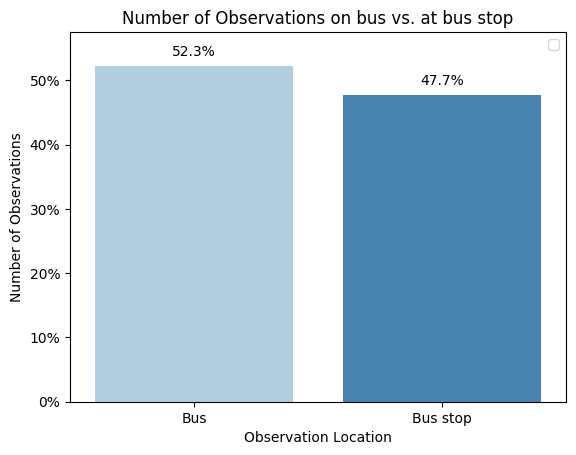

In [151]:
# Plot how if I was on or off of the bus
plot_categorical(df, 
                 plottype='countplot',
                 col_name='recording_data_from', 
                 hue_name=None,
                 title='Number of Observations on bus vs. at bus stop', 
                 xlabel='Observation Location', 
                 ylabel='Number of Observations',
                 color_palette='Blues',
                 legend=False)

C:\Users\trist\AppData\Local\Temp\ipykernel_13252\477209316.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=proportions.index, y=proportions.values, hue=hue_name, palette=color_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


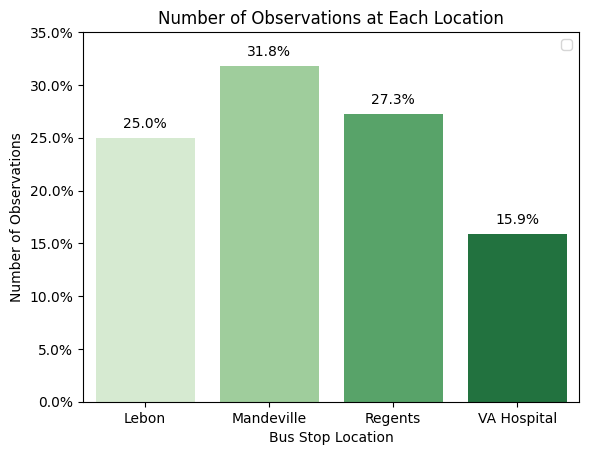

In [152]:
# Plot which stops I made my observations at
plot_categorical(df, 
                 plottype='countplot',
                 col_name='stop_location', 
                 title='Number of Observations at Each Location', 
                 xlabel='Bus Stop Location', 
                 ylabel='Number of Observations',
                 color_palette='Greens')

C:\Users\trist\AppData\Local\Temp\ipykernel_13252\1577876131.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot( x=df['bus_number'], palette='Purples')


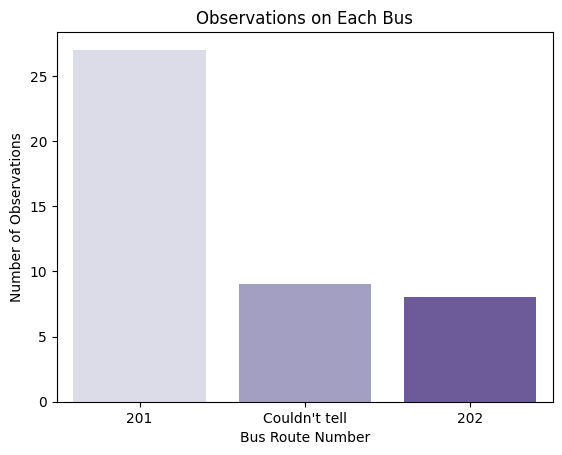

In [153]:
# Rephrase Not Applicables for context
df.loc[df['bus_number'] == 'n/a', 'bus_number'] = "Couldn't tell"
# Decimals on bus numbers don't make sense
def remove_decimal(x):
    try:
        return int(float(x))
    except ValueError:
        return x
# Apply the function to the 'bus_number' column
df['bus_number'] = df['bus_number'].apply(remove_decimal)
# Plot how many observations I made on each bus number
ax = sns.countplot( x=df['bus_number'], palette='Purples')
plt.title('Observations on Each Bus')
plt.xlabel('Bus Route Number')
plt.ylabel('Number of Observations')
plt.show()

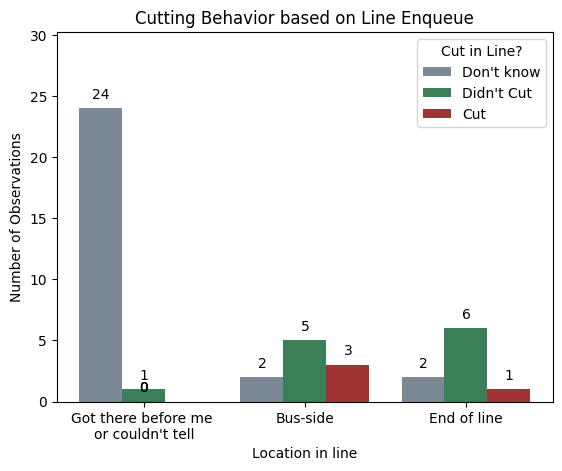

In [154]:
# # Plot where subjects got into line at the bust stop
df['cu:_cut_in_line'] = ['Cut' if x == True else x for x in df['cu:_cut_in_line']]
df['cu:_cut_in_line'] = ["Didn't Cut" if x == False else x for x in df['cu:_cut_in_line']]
df['cu:_cut_in_line'] = ["Don't know" if x == 'n/a' else x for x in df['cu:_cut_in_line']]
# # Combine columns
def combine_columns(row):
    if row['ee:_enqueued_at_the_end-side'] == 'n/a' and row['eb:_enqueued_at_the_front/bus_stop_side'] == 'n/a':
        return "Got there before me \nor couldn't tell"
    elif row['ee:_enqueued_at_the_end-side']:
        return 'Bus-side'
    elif row['eb:_enqueued_at_the_front/bus_stop_side']:
        return 'End of line'
# Apply the function to each row
df['entered_line_where'] = df.apply(combine_columns, axis=1)
# Drop the original columns without reassigning df
df.drop(['ee:_enqueued_at_the_end-side', 'eb:_enqueued_at_the_front/bus_stop_side'], axis=1, inplace=True)
# Rephrase Not Applicables for context
hue_palette = {"Don't know" : 'lightslategray', "Cut" : 'firebrick', "Didn't Cut" : 'seagreen'}
ax = sns.countplot(df, x='entered_line_where', hue='cu:_cut_in_line', palette=hue_palette, legend=True)
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.2)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.title('Cutting Behavior based on Line Enqueue')
plt.xlabel('Location in line')
plt.ylabel('Number of Observations')
ax.legend().set_title('Cut in Line?')
plt.plot()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))


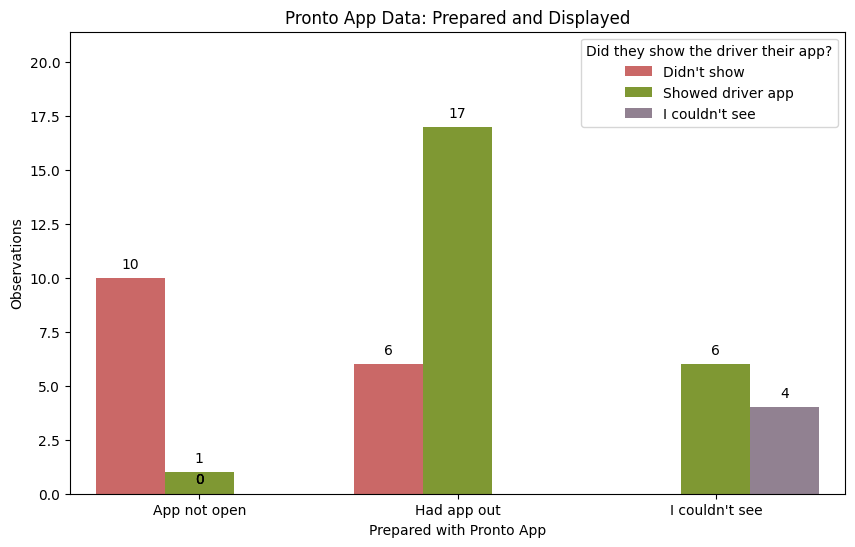

In [155]:
# Plot Pronto data
# Rename values for context
df['pp:_prepared_with_pronto_app'] = ['Had app out' if x == True else x for x in df['pp:_prepared_with_pronto_app']]
df['pp:_prepared_with_pronto_app'] = ['App not open' if x == False else x for x in df['pp:_prepared_with_pronto_app']]
df['pp:_prepared_with_pronto_app'] = ["I couldn't see" if x == 'n/a' else x for x in df['pp:_prepared_with_pronto_app']]

df['dp:_displayed_pronto_app'] = ['Showed driver app' if x == True else x for x in df['dp:_displayed_pronto_app']]
df['dp:_displayed_pronto_app'] = ["Didn't show" if x == False else x for x in df['dp:_displayed_pronto_app']]
df['dp:_displayed_pronto_app'] = ["I couldn't see" if x == 'n/a' else x for x in df['dp:_displayed_pronto_app']]

# Plotting
plt.figure(figsize=(10, 6))
hue_palette_pronto = {"I couldn't see" : '#947e94', "Didn't show" : '#db5856', "Showed driver app" : '#87a922'}
ax = sns.countplot(x='pp:_prepared_with_pronto_app', hue='dp:_displayed_pronto_app', palette=hue_palette_pronto, data=df)
plt.xlabel('Prepared with Pronto App')
plt.ylabel('Observations')
plt.title('Pronto App Data: Prepared and Displayed')
ax.legend().set_title('Did they show the driver their app?')
y_max = ax.get_ylim()[1]
# Extend the y-axis limit to create space for the annotations
ax.set_ylim(0, y_max * 1.2)  # Increase y-axis max by 20%
# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.show()


In [156]:
# Determine if student was first or one of the first to board based 
# on timestamp range and bus stop
# First set column to False
df['first_to_board'] = False
# Manually pick out observations that were of students who boarded first
list_of_top_3 = [0,1,2,7,8,9,13,14,15,17,18,19,26,27,28,31,32,33,35,36,37,38,41,42,45]
for num in list_of_top_3:
    df.loc[num,'first_to_board'] = True

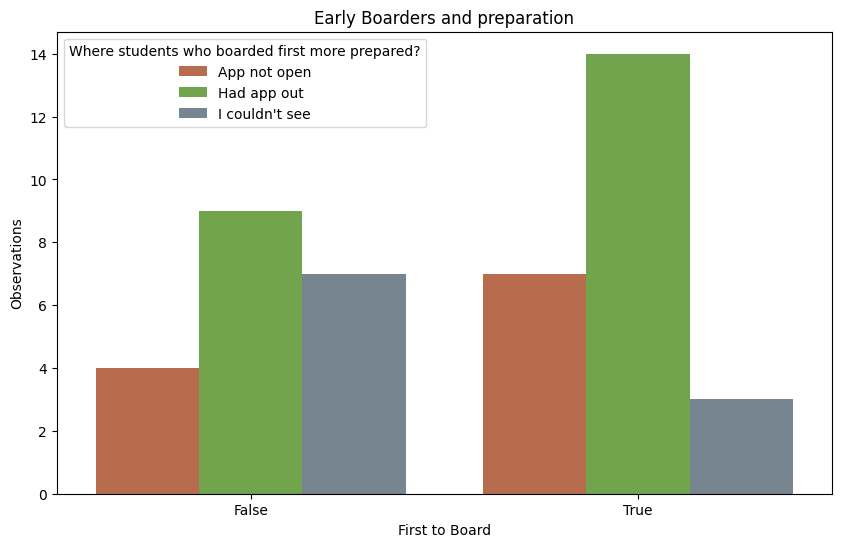

In [157]:
# Plot students who board first vs. those who don't with respect to prepared with pronto
plt.figure(figsize=(10, 6))
hue_palette_pronto = {"I couldn't see" : '#738595', "App not open" : '#c9643b', "Had app out" : '#70b23f'}
ax = sns.countplot(x='first_to_board', hue='pp:_prepared_with_pronto_app', palette=hue_palette_pronto, data=df)
plt.xlabel('First to Board')
plt.ylabel('Observations')
plt.title('Early Boarders and preparation')
ax.legend().set_title('Where students who boarded first more prepared?')



In [158]:
df.columns

Index(['timestamp', 'recording_data_from', 'stop_location', 'bus_number',
       'cu:_cut_in_line', 'pp:_prepared_with_pronto_app',
       'dp:_displayed_pronto_app', 'sp:_scanned_pronto_app',
       'wh:_wearing_headphones', 'we:_wearing_earbuds', 'si:_sitting',
       'ua:_undergraduate_appearance', 'hp:_hands_in_pockets',
       'ce:_concurrent_entrance_dilemma', 'pf:_let_peer_go_first',
       'ig:_in_a_group', 'entered_line_where', 'first_to_board'],
      dtype='object')

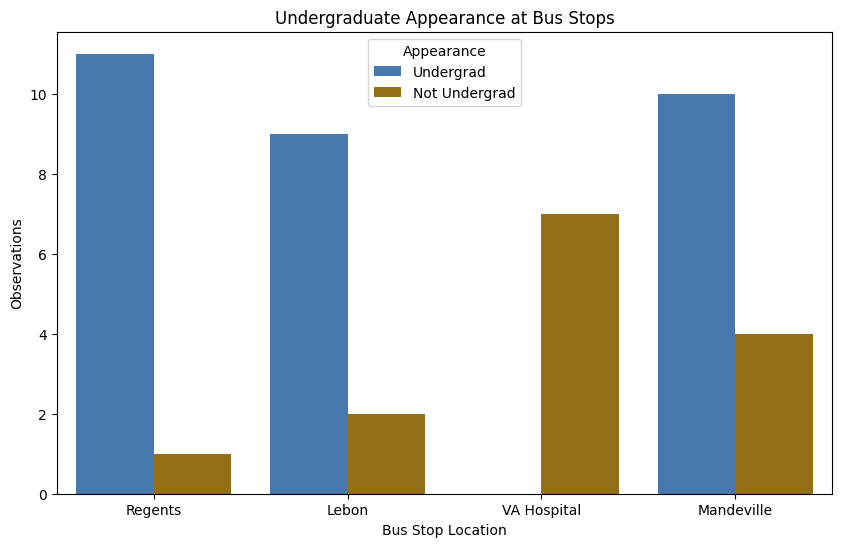

In [159]:
# Plot undergraduate appearance among bus stops
# Rename values for context
df['ua:_undergraduate_appearance'] = ['Undergrad' if x == True else x for x in df['ua:_undergraduate_appearance']]
df['ua:_undergraduate_appearance'] = ['Not Undergrad' if x == False else x for x in df['ua:_undergraduate_appearance']]
df['ua:_undergraduate_appearance'] = ["Identity unknown" if x == 'n/a' else x for x in df['ua:_undergraduate_appearance']]
# Plotting
plt.figure(figsize=(10, 6))
hue_palette_ua = {"Identity unknown" : '#947e94', "Undergrad" : '#3778bf', "Not Undergrad" : '#a87900'}
ax = sns.countplot(x='stop_location', hue='ua:_undergraduate_appearance', palette=hue_palette_ua, data=df)
plt.xlabel('Bus Stop Location')
plt.ylabel('Observations')
plt.title('Undergraduate Appearance at Bus Stops')
ax.legend().set_title('Appearance')



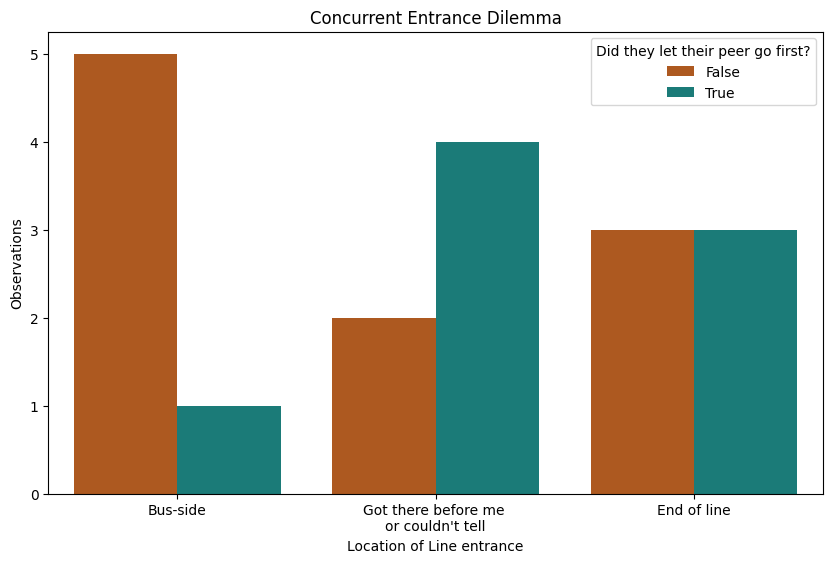

In [160]:
# Of students who encountered a concurrent entrance, who let who go first and 
# which line were they in
df_concurrent = df[df['ce:_concurrent_entrance_dilemma'] == True]
# Filter by students which line they entered from
# df_concurrent = df[df['entered_line_where'] != "Got there before me \nor couldn't tell"]

# Filter out observations where the student didn't know who went first
df_concurrent = df_concurrent[df_concurrent['pf:_let_peer_go_first'] != "n/a"]
# Filter observations where the student didn't know where they entered from

# Plotting
plt.figure(figsize=(10, 6))
hue_palette_concurrent = {'Bus-side': '#c45508', 'End of line' : '#0b8b87', "Got there before me \nor couldn't tell" : '#947e94'}
hue_palette_concurrent = {False: '#c45508', True : '#0b8b87'}

ax = sns.countplot(x='entered_line_where',hue='pf:_let_peer_go_first', palette=hue_palette_concurrent, data=df_concurrent)
plt.xlabel('Location of Line entrance')
plt.ylabel('Observations')
plt.title('Concurrent Entrance Dilemma')
ax.legend().set_title('Did they let their peer go first?')




In [161]:
df.head()

,timestamp,recording_data_from,stop_location,bus_number,cu:_cut_in_line,pp:_prepared_with_pronto_app,dp:_displayed_pronto_app,sp:_scanned_pronto_app,wh:_wearing_headphones,we:_wearing_earbuds,si:_sitting,ua:_undergraduate_appearance,hp:_hands_in_pockets,ce:_concurrent_entrance_dilemma,pf:_let_peer_go_first,ig:_in_a_group,entered_line_where,first_to_board
0,2024-01-22 12:31:32,Bus stop,Regents,201,Don't know,App not open,Didn't show,False,False,True,False,Undergrad,False,False,n/a,False,Got there before me \nor couldn't tell,True
1,2024-01-22 12:31:58,Bus stop,Regents,201,Don't know,App not open,Showed driver app,False,False,True,False,Undergrad,False,False,n/a,False,Got there before me \nor couldn't tell,True
2,2024-01-22 12:32:16,Bus stop,Regents,201,Don't know,Had app out,Showed driver app,False,False,True,True,Undergrad,False,False,n/a,False,Got there before me \nor couldn't tell,True
3,2024-01-22 12:34:44,Bus stop,Regents,201,Don't know,App not open,Didn't show,False,False,False,True,Not Undergrad,True,False,n/a,False,Got there before me \nor couldn't tell,False
4,2024-01-22 12:34:44,Bus stop,Regents,201,Didn't Cut,Had app out,Showed driver app,False,False,True,True,Undergrad,False,False,n/a,False,Bus-side,False


C:\Users\trist\AppData\Local\Temp\ipykernel_13252\1395444228.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x='timestamp', y='pp:_prepared_with_pronto_app', palette=hue_palette_pronto, data=df)


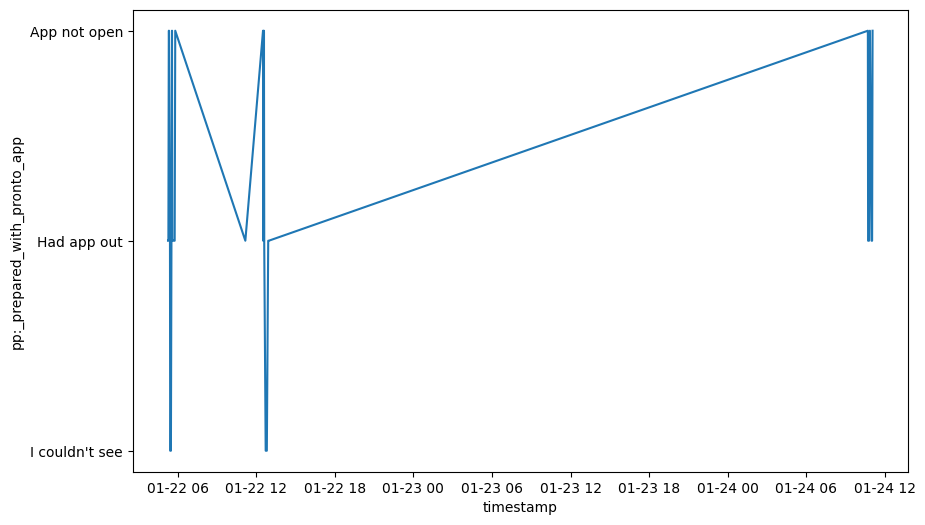

In [162]:
# NOT FINISHED
# plot timestamp vs pronto data with a line plot )
# Plotting
plt.figure(figsize=(10, 6))
hue_palette_pronto = {"I couldn't see" : '#738595', "App not open" : '#c9643b', "Had app out" : '#70b23f'}
ax = sns.lineplot(x='timestamp', y='pp:_prepared_with_pronto_app', palette=hue_palette_pronto, data=df)
